In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from operator import itemgetter
import math
from sklearn.datasets import make_classification
 

In [8]:
train_data = np.genfromtxt("sat.trn")
X_train = train_data[:,0:36]
Y_train = train_data[:,36]

test_data = np.genfromtxt("sat.tst")
X_test = test_data[:,0:36]
Y_test = test_data[:,36]

In [9]:
X_train.shape

(4435, 36)

In [10]:
Y_train

array([3., 3., 3., ..., 4., 4., 4.])

In [11]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,30))
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,Y_train)
#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 10


The optimal number of neighbors is 10
The minimum misclassification error is 0.13777377829296567


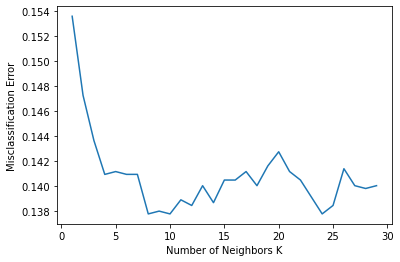

In [13]:
# creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
neighbours = list(range(1,30))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')  
    cv_scores.append(scores.mean())


# changing to misclassification error
mse = np.array([1 - x for x in cv_scores])
index_min = np.argmin(mse)
optimal_k = index_min+1
print("The optimal number of neighbors is {}".format(optimal_k))
print("The minimum misclassification error is {}".format(mse[index_min]))

 
# plot misclassification error vs k
plt.plot(neighbours, mse)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
 


In [14]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,Y_train)
predicted= model.predict(X_test)

In [15]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predicted))

Accuracy: 0.895


In [16]:
import numpy as np
import operator

def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [17]:
class KNearestNeighbors():
    
    def __init__(self, K=3):
        self.K = K

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
        
    def predict(self, X_test):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations in the test set
        for i in range(len(X_test)):            
            
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in self.X_train])
            
            # sort the distances and return the indices of K neighbors
            dist_sorted = dist.argsort()[:self.K]
            
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            
            # append the class label to the list
            predictions.append(sorted_neigh_count[0][0])
        return predictions    
        

In [18]:
clf = KNearestNeighbors(K=10)
clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, predictions))

Accuracy: 0.895


In [19]:
#TSNE PLOTS
X = X_train 
y = Y_train 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [20]:
X.shape

(4435, 36)

In [21]:
y.shape

(4435,)

In [22]:
X_2d = tsne.fit_transform(X)
X_2d

array([[ 0.7299172, 77.959915 ],
       [ 8.49585  , 30.78419  ],
       [-3.7053242, 31.460503 ],
       ...,
       [37.50591  ,  0.8119747],
       [38.16821  ,  2.2965353],
       [38.27333  ,  2.709112 ]], dtype=float32)

In [23]:
X_2d[y == 1, 0].shape

(1072,)

In [24]:
target=[1, 2, 3, 4, 5, 6, 7]

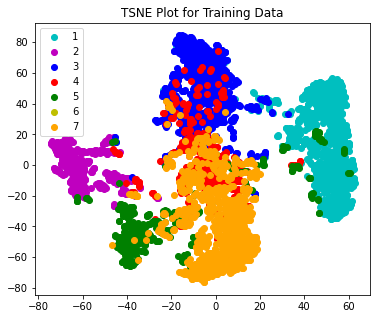

In [25]:
plt.figure(figsize=(6, 5))
colors = 'c', 'm', 'b', 'r', 'g', 'y', 'orange'  
for i, c, label in zip(target, colors, target):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.title("TSNE Plot for Training Data")
plt.show()


In [26]:
#TSNE PLOTS
X1 = X_test
y1 = Y_test
from sklearn.manifold import TSNE
tsne1 = TSNE(n_components=2, random_state=0)

In [27]:
X1.shape

(2000, 36)

In [28]:
y1.shape

(2000,)

In [29]:
X_2d1 = tsne.fit_transform(X1)


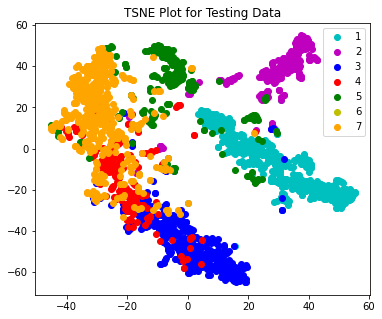

In [30]:
plt.figure(figsize=(6, 5))
colors = 'c', 'm', 'b', 'r', 'g', 'y', 'orange'  
for i, c, label in zip(target, colors, target):
    plt.scatter(X_2d1[y1 == i, 0], X_2d1[y1 == i, 1], c=c, label=label)
plt.legend()
plt.title("TSNE Plot for Testing Data")

plt.show()